<a href="https://colab.research.google.com/github/EngelMichael/FRA_UAS_AI_recognition_Project/blob/main/AI_Classifier_FRA_UAS_Informatik_Projekt_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accessable Hardware

In [1]:
!nvidia-smi

Sun Jan  5 13:48:00 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Setup

In [3]:
%%capture
!pip install transformers
!pip install pytorch-lightning
!pip install datasets
!pip install wandb
import pandas as pd

In [4]:
from datasets import load_dataset

ds = load_dataset("Hello-SimpleAI/HC3", "all")

# https://huggingface.co/datasets/Hello-SimpleAI/HC3


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.49k [00:00<?, ?B/s]

HC3.py:   0%|          | 0.00/9.47k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/39.3M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/24322 [00:00<?, ? examples/s]

In [5]:
ds

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'human_answers', 'chatgpt_answers', 'source'],
        num_rows: 24322
    })
})

# Splitting into training and validation set:

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and validation sets
ds = ds["train"].train_test_split(test_size=0.2, seed=42)

# Access the train and validation sets
train_ds = ds["train"]
val_ds = ds["test"]

print(f"Training set size: {len(train_ds)}")
train_ds
print(f"Validation set size: {len(val_ds)}")

Training set size: 19457
Validation set size: 4865


In [7]:
ds #confirming split 80%/20% 19457 to 4865

DatasetDict({
    train: Dataset({
        features: ['id', 'question', 'human_answers', 'chatgpt_answers', 'source'],
        num_rows: 19457
    })
    test: Dataset({
        features: ['id', 'question', 'human_answers', 'chatgpt_answers', 'source'],
        num_rows: 4865
    })
})

Coverting to Panda Dataset for easier handling:

In [8]:
train_df = train_ds.to_pandas()
val_df = val_ds.to_pandas()

print(f"Training DataFrame shape: {train_df.shape}")
print(f"Validation DataFrame shape: {val_df.shape}")

Training DataFrame shape: (19457, 5)
Validation DataFrame shape: (4865, 5)


# Inspect Data

In [9]:
train_df

,id,question,human_answers,chatgpt_answers,source
0,15299,How come in the American justice system most p...,[The death penalty is irreversible . If someon...,"[In the United States, the death penalty is a ...",reddit_eli5
1,6104,how can my smoke detector not be set off by my...,[Smoke detectors work by having a radioactive ...,[Smoke detectors are designed to detect certai...,reddit_eli5
2,12169,How come you ca n't give blood in the US if yo...,[There are many concerns besides the plague . ...,[There are certain restrictions on who can don...,reddit_eli5
3,9344,Why are license plates blurred out on TV when ...,[They want to protect the privacy of the vehic...,[There are a few reasons why license plates mi...,reddit_eli5
4,13368,Why are n't blimps and zeppelins more popular ...,"[They 're really , really , really , really sl...",[Blimps and zeppelins are not as popular as ot...,reddit_eli5
...,...,...,...,...,...
19452,2189,Yeast Just what the hell is it ? And where doe...,[Yeast is a fungus ; it 's a single - celled c...,[Yeast is a type of single-celled microorganis...,reddit_eli5
19453,4802,Neural Network vs Alpha - beta pruning What ar...,[That 's a hard question because you really co...,[An artificial neural network (ANN) is a type ...,reddit_eli5
19454,5668,the territorial boundaries in Antarctica Edit ...,[Many of the claims generally match the longit...,[Antarctica is a continent that is located at ...,reddit_eli5
19455,22113,How (or is it necessary) to rebalance a 401k w...,[Rebalance is across asset-classes which are m...,[It is not strictly necessary to rebalance a 4...,finance


In [11]:
train_df.head(20)

,id,question,human_answers,chatgpt_answers,source
0,15299,How come in the American justice system most p...,[The death penalty is irreversible . If someon...,"[In the United States, the death penalty is a ...",reddit_eli5
1,6104,how can my smoke detector not be set off by my...,[Smoke detectors work by having a radioactive ...,[Smoke detectors are designed to detect certai...,reddit_eli5
2,12169,How come you ca n't give blood in the US if yo...,[There are many concerns besides the plague . ...,[There are certain restrictions on who can don...,reddit_eli5
3,9344,Why are license plates blurred out on TV when ...,[They want to protect the privacy of the vehic...,[There are a few reasons why license plates mi...,reddit_eli5
4,13368,Why are n't blimps and zeppelins more popular ...,"[They 're really , really , really , really sl...",[Blimps and zeppelins are not as popular as ot...,reddit_eli5
5,3995,What happens when you pass the redline in a ma...,[Redlines are arbitrary figures worked out by ...,[When you pass the redline in a manual transmi...,reddit_eli5
6,15820,Torque ? What s the difference between torque ...,[Torque is angular force . It 's how hard you ...,[Torque is a measure of the rotational force t...,reddit_eli5
7,18730,"Please explain what is ""Software agent""","[In computer science, a software agent or soft...",[A software agent is a program that performs a...,wiki_csai
8,8776,College sports in the US I just do n't underst...,[I think this is just a culture difference bet...,"[College sports in the United States, especial...",reddit_eli5
9,17591,when was pearl harbor bombed,[The attack on Pearl Harbor (called Hawaii Ope...,"[Pearl Harbor was bombed on December 7, 1941. ...",open_qa


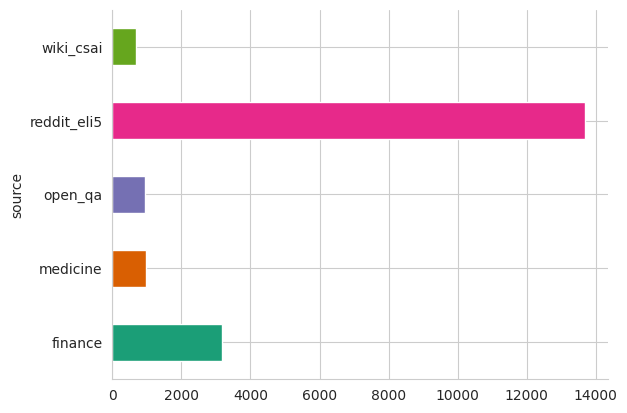

In [ ]:
# @title source training

from matplotlib import pyplot as plt
import seaborn as sns
train_df.groupby('source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
val_df.head()

,id,question,human_answers,chatgpt_answers,source
0,9439,How a Condensing Boiler works . Basic explanat...,[An ordinary boiler works like this : fuel is ...,[A condensing boiler is a type of heating syst...,reddit_eli5
1,15859,Thinking without a language Can a human think ...,"[Linguist here , and all these anecdotal answe...","[Yes, it is possible for a human to think with...",reddit_eli5
2,22004,Calculate price to earning and price to sale v...,"[Too calculate these values, information conta...",[To calculate the price-to-earnings (P/E) rati...,finance
3,19831,Is it possible to see option prices from the p...,"[Yes, past option prices are available for man...","[Yes, it is possible to see option prices from...",finance
4,10204,"When everything is silent , what is the buzzin...",[You have little hairs in your ear that interp...,[The buzzing sound that you might hear in comp...,reddit_eli5


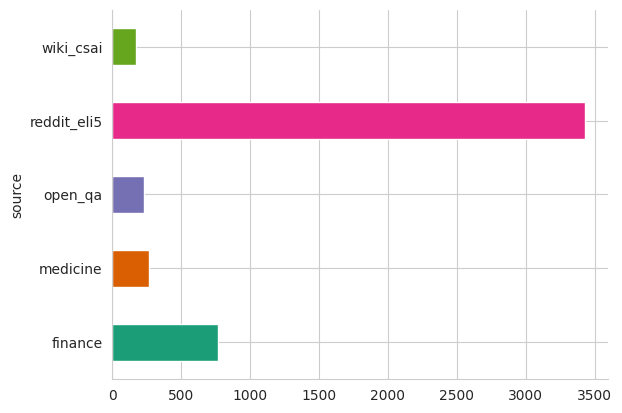

In [ ]:
# @title source validation

from matplotlib import pyplot as plt
import seaborn as sns
val_df.groupby('source').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
'''
avg_human_symbols = train_df['human_answers'].str.len().mean()
avg_chatgpt_symbols = train_df['chatgpt_answers'].str.len().mean()
avg_question_symbols = train_df['question'].str.len().mean

print(f"Average number of symbols in 'human_answers': {avg_human_symbols}")     #problem with [""] at beginning and end of sentence
print(f"Average number of symbols in 'chatgpt_answers': {avg_chatgpt_symbols}")
print(f"Average number of symbols in 'question': {avg_question_symbols}")
'''

avg_human_symbols = train_df['human_answers'].apply(lambda x: sum(len(s) for s in x)).mean()
avg_question_symbols = train_df['question'].apply(lambda x: sum(len(s) for s in x)).mean()
avg_chatgpt_symbols = train_df['chatgpt_answers'].apply(lambda x: sum(len(s) for s in x)).mean()

print(f"Average number of symbols in 'human_answers': {avg_human_symbols}")
print(f"Average number of symbols in 'chatgpt_answers': {avg_chatgpt_symbols}")
print(f"Average number of symbols in 'question': {avg_question_symbols}")


Average number of symbols in 'human_answers': 1642.3486662897672
Average number of symbols in 'chatgpt_answers': 1118.4777714961197
Average number of symbols in 'question': 165.7541758750064


# Dataset

# Data module

# Neuer Abschnitt